In [1]:
# ====================================
# 1. Cargar librerías
# ====================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:

# ====================================
# 2. Cargar datos
# ====================================
data = pd.read_csv("/Users/gabrielreyes/Downloads/samsung.csv")
print("Primeras filas del dataset:")
display(data.head())

Primeras filas del dataset:


,Date,Close,Volume
0,02/01/2008,10880,18047200
1,03/01/2008,10920,19346500
2,04/01/2008,10780,17997350
3,07/01/2008,10380,39787200
4,08/01/2008,10320,24783700


In [5]:
# ====================================
# 3. Preprocesamiento
# ====================================
# Nos quedamos solo con variables numéricas
X = data[["Close", "Volume"]]
# Escalado de datos para mejorar rendimiento de K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

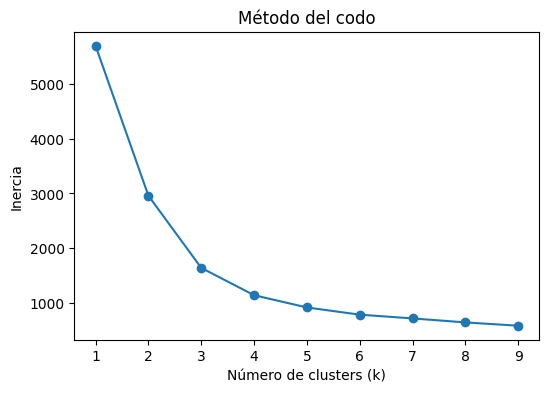

In [6]:
# ====================================
# 4. Determinar número óptimo de clusters (Método del codo)
# ====================================
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1, 10), inertia, marker="o")
plt.title("Método del codo")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")
plt.show()


In [7]:
# ====================================
# 5. Entrenar modelo K-Means
# ====================================
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Etiquetas de cluster
data["Cluster"] = kmeans.labels_


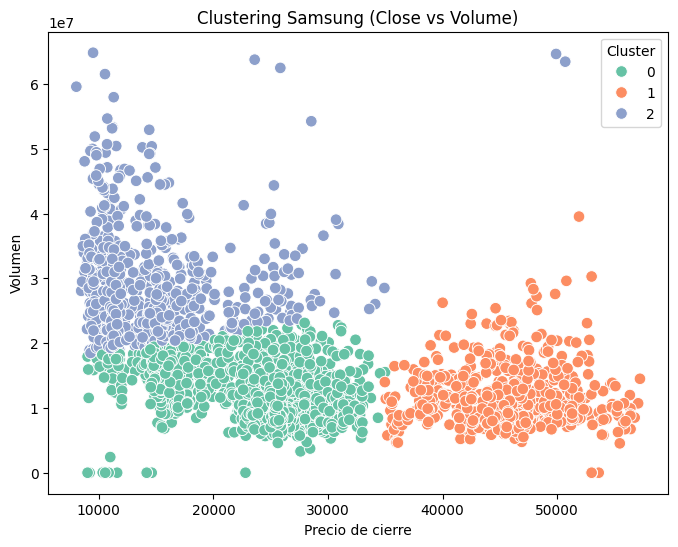

In [8]:
# ====================================
# 6. Visualización personalizada
# ====================================
plt.figure(figsize=(8,6))
sns.scatterplot(x="Close", y="Volume", hue="Cluster", data=data, palette="Set2", s=70)
plt.title("Clustering Samsung (Close vs Volume)")
plt.xlabel("Precio de cierre")
plt.ylabel("Volumen")
plt.legend(title="Cluster")
plt.show()

In [9]:
# ====================================
# 7. Interpretación
# ====================================
print("Interpretación:")
print("- Cada color representa un grupo de días con comportamiento similar en precio y volumen.")
print("- El clustering puede ayudar a identificar patrones como días de alta volatilidad o bajo movimiento.")

Interpretación:
- Cada color representa un grupo de días con comportamiento similar en precio y volumen.
- El clustering puede ayudar a identificar patrones como días de alta volatilidad o bajo movimiento.
